# Markov Decision Processes

## 1. Markov Process (MP)
A $Markov \ Process$ (or $Markov \ Chain$) is a memoryless randam process. It's a sequence of random stantes $S_1, S_2,...$ with the Markov property.
So there are 2 components of MP:
* A finite set of states which satisfy Markov property.
* A corresponding state transition probability matrix.

### 1.1 Markov Property
A state $S_t$ is $Markov$ if and and only if:
$$\mathcal P(S_{t+1} \mid S_t)=\mathcal P(S_{t+1} \mid S_1,...,S_t)$$

### 1.2 State Transition Matrix
For a Markov state $s$ and successor state $s^{'}$, the $state transition probability$ is defined by:
$$\mathcal P_{ss^{'}}=\mathcal P(S_{t+1}=s^{'} \mid S_t=s)$$
State transition matrix $P$ defines transition probabilities from all state $s$ to all successor states $s^{'}$.
* We define the row represent the current state, then the sum of each row of the matrix is 1.

### 1.3 Example
Here is a simple markov process example, where there are 5 states. Then randomly generate a state transition matrix as follow:

In [1]:
import numpy as np

n_state = 5
state_transition = np.zeros((n_state, n_state))

for i in range(n_state):
    state_transition[i] = np.random.rand(n_state)
    state_transition[i] /= state_transition[i].sum()

print(state_transition)

[[0.23520112 0.09186801 0.26764791 0.111933   0.29334996]
 [0.08028889 0.32275869 0.28499822 0.16513109 0.14682311]
 [0.2995472  0.17293787 0.38937749 0.0899736  0.04816384]
 [0.26536179 0.14306981 0.28606174 0.23911311 0.06639356]
 [0.23214912 0.13326566 0.29235481 0.16500066 0.17722975]]


## 2. Markov Reward Process (MRP)
A $Markov \ Reward \ Process$ is a Markov chain with values. Remember that Markov chain has 2 components, now a MRP has 4 components:
* A finite set of states which satisfy Markov property.
* A corresponding state transition probability matrix.
* A reward function.
* A discount factor.

### 2.1 Reward and Reward Function
The $reward \ R_t$ is a feedback from the enviroment when the state transits from $S_{t-1}$ to $S_t$. Then what is the $reward \ function$? Here I list 2 definitions of reward function:
* In Wikipedia, the reward function consider all situations between the current state $s$ and successor state $s^{'}$. So this reward function has the same shape as the state transition matrix:
$$\mathcal R_{ss^{'}}=R(S_t=s,S_{t+1}=s^{'})$$
* In David Silver's lecture, the reward function is defined as the conditional expectation of the random variable $R_{t+1}$ at state $S_t=s$:
$$\mathcal R_{s}=E[R_{t+1} \mid S_t=s]$$

Consider the data structure of these 2 types of definition. The reward function of Wiki MRP is a matrix of size $n\_state*n\_state$. The reward function of DS MRP is a vector of size $n\_state$, and can be converted by calculate the dot product of each row in state transition matrix and the corresponding row in reward matrix from Wiki MRP:
$$\mathcal R_{s}=\sum_{s^{'}}\mathcal P_{ss^{'}}\times \mathcal R_{ss^{'}}$$


### 2.2 Return and Discount Factor
The $return \ G_t$ is the total discounted reward from time-step $t$:
$$G_t=R_{t+1}+\gamma R_{t+2}+...=\sum_{k=0}^{\infty}\gamma^k R_{t+k+1}$$
* The discount factor $\gamma \in [0,1]$ is the present value of future rewards in one step.
* 

### 2.3 Example
Consider the Wiki's definition of MRP, generate a reward matrix which has the same rows and columns as state transition matrix. Then convert it to the DS's definition of MRRP.

In [2]:
reward_matrix = np.zeros((n_state, n_state))
reward_function = np.zeros(n_state)

for i in range(n_state):
    reward_matrix[i] = np.random.randint(10, size=n_state) - 3

for i in range(n_state):
    reward_function[i] = np.dot(state_transition[i, :], reward_matrix[i, :])

print('R(s, s\'):\n', reward_matrix, '\n')
print('R(s):\n', reward_function)

R(s, s'):
 [[ 1. -1.  4.  2. -1.]
 [-3.  5.  6.  3. -3.]
 [-2.  6.  2.  3.  1.]
 [-3.  3.  4.  2.  6.]
 [-2.  2. -1.  3.  3.]] 

R(s):
 [1.1444408  3.13784007 1.53537247 1.65395858 0.5365695 ]


## 3. Some Mathematical Properties
Then I want to explore the stationary distribution of this markov process. Generate some initial distribution probabilities p0, and run this part for several times with different p0. The result shows that the probabilities always converge. Thus, this markov process has stationary distribution.

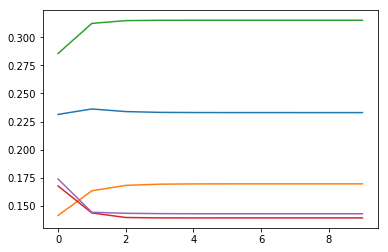

In [5]:
import matplotlib.pyplot as plt

p0 = np.random.rand(n_state)
p0 /= p0.sum()
max_iter = 10
history = np.zeros((max_iter, n_state))

for i in range(max_iter):
    p0 = p0.dot(state_transition)
    history[i][:] = p0

for i in range(n_state):
    plt.plot(range(max_iter), history[:, i])